---
# __Machine Learning Workshop Part-B__

# Learning objectives

At the end of the exercise, you should be able to:
- Conduct an end-to-end classification analysis given data
- Interpret model with example global and local interpretaion methods.

In [1]:
# First thing first: test your install
import sklearn, pandas, matplotlib, seaborn, imblearn, numpy, shap, tqdm

# If you encounter error, talk to the instructor and/or your neighbor ASAP

## Outline

- [5 min] Intro (powerpoint)
- [[15 min] Part A review](#review)
- [[01 min] Step 1. Define ML problem](#step1)
- [[10 min] Step 2. Exploratory data analysis](#step2)
- [[05 min] Step 3/4: Split train/test and feature engineering](#step3_4)
- [[05 min] Step 5: Select model](#step5)
- [[05 min] Step 6: Repeat 2-5](#step6)
- [[05 min] Step 7: Evalute model](#step7)
- [[05 min] Step 8: Interpret model](#step7)

----
<a name="review"></a>

## __Part A review__

&#9989; <font color=blue>**DO THIS:**</font> In __Part A__, we have gone thorugh the major steps. Share your understanding of each step with your neighbors and discuss if any step, terminology, or question that you have. in 5~7 minutes, we will bring the group back for a discussion.

### &#9978; **<font color=purple>PAUSE: once you finish discussion, please turn your attention to the instructor. </font>**

----
<a name="step1"></a>
## __Step 1. Define ML problem__

___Problem statement___: 
- Given:
  - Known genes in general metabolism (GM) or specialized metabolism (SM)
  - Various features of genes
    - E.g., expression levels, functional category they belong to 
- How can we use them to:
  - Distinguish genes involved in GM from those involved in SM?


&#9989; <font color=blue>**DO THIS:**</font> Discuss with your neighbors, what features should we use to best distinguish GM and SM genes?

### &#9978; **<font color=purple>PAUSE: once you finish discussion, please turn your attention to the instructor. </font>**

----
<a name="step2"></a>
## __Step 2. Exploratory data analysis__

&#9989; **<font color=blue>DO THIS:</font>** Run the following cell to load the data. Note that we set a random seed (`rand_seed`). This is so we can reprdouce the random data generated along the way so others can repeat the same analysis and get the similar, if not the same results.

In [2]:
import pandas as pd

rand_seed = 42

# Load the dataset from the file enzyme_gene.csv as a Pandas DataFrame where the
# `Gene` column is read in as index.
enzyme_gene = pd.read_csv("enzyme_gene.csv", index_col=0)

features = enzyme_gene.columns[1:] # get all feature names

# Print out 4 randomly sampled instances
enzyme_gene.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT1G20010,GM,1.00,17.0,96.75,0.0,0.0,0.0,0.0,0.0,0.895,0.728,0.980,0.969,0.917,0.829,938.598188,2632.751574,61.0
AT3G07410,unknown,NaN,76.0,76.39,0.0,0.0,0.0,0.0,NaN,0.771,0.730,0.853,0.695,0.837,0.692,136.422979,819.936561,61.0
AT3G26770,unknown,0.58,66.0,57.38,0.0,0.0,0.0,1.0,0.0,0.689,0.545,0.745,0.695,0.883,0.772,6.806060,2078.927512,15.0
AT2G39640,unknown,0.72,88.0,57.87,0.0,0.0,0.0,0.0,0.0,0.683,0.676,0.722,0.577,0.690,0.655,5.207340,220.928012,2.0


&#9989; **<font color=red>QUESTION:</font>**  Discuss with your neighbors, what features should we use to best distuiguish GM and SM genes?

### Univariate EDA

&#9989; **<font color=blue>DO THIS:</font>** Earlier, we use `enzyme_gene.sample(4)` to get a few samples from the `enzyme_gene` dataframe. Replace `sample(4)` with `describe()` and see what information become available.

In [3]:
# Put your code here

##ANSWER##
enzyme_gene.describe()
##ANSWER##

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,3550.000000,4152.000000,3899.000000,4769.000000,4769.000000,4501.000000,4512.000000,4240.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4150.000000,4150.000000,4150.000000
mean,0.804897,29.770472,66.566127,0.279094,0.122667,0.049767,0.270612,0.051651,0.789531,0.725130,0.848149,0.793080,0.815422,0.746845,428.028998,2191.368616,44.368675
std,0.254692,41.524700,18.041234,0.448601,0.328089,0.217487,0.444325,0.221347,0.090319,0.106227,0.079397,0.099534,0.082482,0.104096,1042.343895,3327.095677,24.428359
min,0.000000,1.000000,19.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424000,0.322000,0.531000,0.445000,0.486000,0.412000,3.233606,5.763663,0.000000
25%,0.690750,4.000000,54.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.731000,0.655000,0.800000,0.728000,0.762000,0.673000,14.464360,326.100708,17.000000
50%,0.940000,11.000000,70.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.737000,0.857000,0.804000,0.822000,0.748000,117.897502,982.311288,60.000000
75%,0.990000,34.000000,80.420000,1.000000,0.000000,0.000000,1.000000,0.000000,0.857000,0.806000,0.908000,0.871000,0.878000,0.824250,400.282721,2564.031166,64.000000
max,1.000000,293.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.982000,0.982000,0.992000,0.983000,0.987000,0.978000,20115.064720,30288.301360,64.000000


&#9989; **<font color=blue>DO THIS:</font>** Write code that will tell us more about `enzyme_gene` by using:

- `shape`
- `nunique()`

In [4]:
# put your codes here

##ANSWER##
print("\nShape:", enzyme_gene.shape)
print("\n### Number unique:\n", enzyme_gene.nunique())
##ANSWER##


Shape: (5238, 18)

### Number unique:
 Label                    3
Func_likelihood        538
Fam_size                56
Max_id_paralog        2525
WGD_alpha                2
WGD_beta_gamma           2
Dup_recent               2
Dup_tandem               2
Singleton                2
Max_PCC_GM_abiotic     429
Max_PCC_SM_abiotic     503
Max_PCC_GM_biotic      383
Max_PCC_SM_biotic      450
Max_PCC_GM_hormone     397
Max_PCC_SM_hormone     487
Expr_med_dev          4150
Expr_max_dev          4149
Expr_breadth_dev        65
dtype: int64


&#9989; **<font color=blue>DO THIS:</font>** Run the following to determine how many entires have `GM`, `SM`, and `Unknown` labels, respectively?

In [5]:
print(enzyme_gene["Label"].value_counts())

unknown    2291
GM         2212
SM          410
Name: Label, dtype: int64


&#9989; **<font color=blue>DO THIS:</font>** Determine the number of `null` entries in each column and print them out.

In [6]:
enzyme_gene.isnull().sum()

Label                  325
Func_likelihood       1688
Fam_size              1086
Max_id_paralog        1339
WGD_alpha              469
WGD_beta_gamma         469
Dup_recent             737
Dup_tandem             726
Singleton              998
Max_PCC_GM_abiotic    1086
Max_PCC_SM_abiotic    1086
Max_PCC_GM_biotic     1086
Max_PCC_SM_biotic     1086
Max_PCC_GM_hormone    1086
Max_PCC_SM_hormone    1086
Expr_med_dev          1088
Expr_max_dev          1088
Expr_breadth_dev      1088
dtype: int64

### Univariate graphical EDA

&#9989; **<font color=blue>DO THIS:</font>** Plot the histograms of all features.

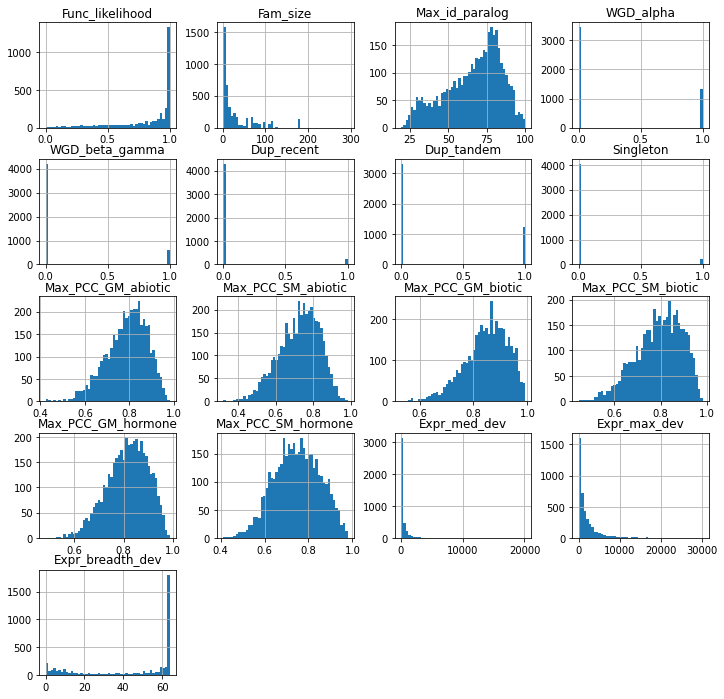

In [7]:
# put your code below

##ANSWER
hist = enzyme_gene.iloc[:, 1:].hist(figsize=(12,12), bins=50)
##ANSWER

&#9989; **<font color=red>QUESTION:</font>**  Discuss with your neighbors, did you see any issues with the dataset based on the univariate analyses?

### &#9978; **<font color=purple>PAUSE: once you finish discussion, please turn your attention to the instructor. </font>**

### Multi-variate non-graphical EDA

&#9989; **<font color=blue>DO THIS:</font>** Determine pairwise Spearman's rank correlations of all features:

In [8]:
# Get all rows from the 2nd column and on (in programming, things start at 0)
features = enzyme_gene.iloc[:,1:]

# Calculate Spearman's rank correlations for all feature pairs
corr = features.corr(method = 'spearman')
corr

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Func_likelihood,1.000000,-0.425232,-0.044509,0.048101,-0.031368,-0.159467,-0.365871,0.145597,0.270916,0.046910,0.133880,0.010729,0.252289,0.087491,0.809380,0.486005,0.803178
Fam_size,-0.425232,1.000000,0.126797,-0.056985,0.013941,0.115253,0.344059,-0.206112,-0.158623,0.013337,-0.052723,0.028097,-0.096479,0.003539,-0.381190,-0.105345,-0.439901
Max_id_paralog,-0.044509,0.126797,1.000000,-0.028074,-0.000748,0.090542,0.231457,-0.274425,-0.026789,-0.020144,-0.027380,-0.002215,0.031349,0.060209,-0.013421,0.076196,-0.051526
WGD_alpha,0.048101,-0.056985,-0.028074,1.000000,0.068015,0.002366,-0.033998,0.006703,0.022448,-0.004108,0.002457,-0.011307,0.011289,0.000698,0.039406,-0.011395,0.049960
WGD_beta_gamma,-0.031368,0.013941,-0.000748,0.068015,1.000000,0.014659,-0.004633,-0.024479,-0.001354,-0.004194,0.014195,0.004963,0.009639,-0.004969,-0.020867,-0.006981,-0.028465
Dup_recent,-0.159467,0.115253,0.090542,0.002366,0.014659,1.000000,0.189511,-0.045019,-0.046663,-0.021227,-0.014142,0.008451,-0.088582,-0.061154,-0.105114,-0.102642,-0.118330
Dup_tandem,-0.365871,0.344059,0.231457,-0.033998,-0.004633,0.189511,1.000000,-0.141858,-0.072686,0.054327,0.009010,0.080658,-0.058476,0.042842,-0.294494,-0.136162,-0.330194
Singleton,0.145597,-0.206112,-0.274425,0.006703,-0.024479,-0.045019,-0.141858,1.000000,0.056676,-0.014765,0.032353,-0.006439,0.006871,-0.052028,0.108895,-0.041977,0.159309
Max_PCC_GM_abiotic,0.270916,-0.158623,-0.026789,0.022448,-0.001354,-0.046663,-0.072686,0.056676,1.000000,0.702527,0.327993,0.275294,0.166645,0.054970,0.312563,0.215558,0.238961
Max_PCC_SM_abiotic,0.046910,0.013337,-0.020144,-0.004108,-0.004194,-0.021227,0.054327,-0.014765,0.702527,1.000000,0.272101,0.311541,0.076733,0.103616,0.094686,0.151211,0.025415


### Multi-variate graphical EDA

&#9989; **<font color=blue>DO THIS:</font>** Plot the pairwise Spearman's rank correlations of all features as a heatmap using Seaborn.

<AxesSubplot:>

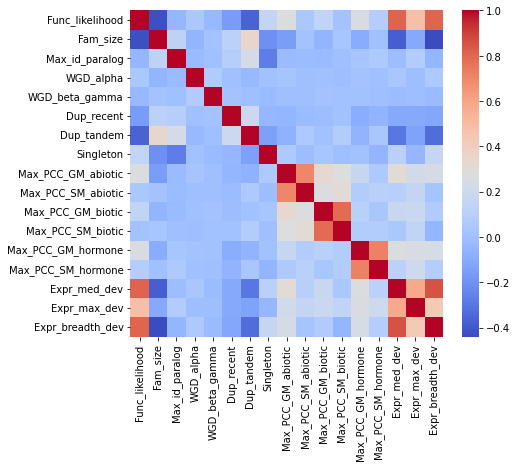

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sns.heatmap(corr, cmap="coolwarm")

&#9989; **<font color=red>QUESTION:</font>**  Discuss with your neighbors, did you see any issues with the dataset based on the univariate analyses?

### &#9978; **<font color=purple>PAUSE: once you finish discussion, please turn your attention to the instructor. </font>**

---
<a name="step3"></a>
## __Step 3: Split train/test__

The best practice is alway to set aside testing data as early as you possibly can. This way, the testing data is truly independent from any of the modeling process aside from the processing steps needed. Nonetheless, there may be things you need to take care of first before splitting the data. In this example, we need to rid of unwanted instances before data split.


### ___Deal with unwanted instances___

&#9989; **<font color=blue>DO THIS:</font>** Filter data so only instances with `SM` and `GM` labels are kept. 

Write code to show that the filtering is working (i.e, no more `unknown` or `NaN`). 

__[Hint]:__ recall we used the `value_count()` function before for this purpose.

In [10]:
labels              = ['GM', 'SM']
label_column        = enzyme_gene['Label']
label_column_filter = label_column.isin(labels)

# enzyme_gene dataframe with only GM and SM
enzyme_gene_fil = enzyme_gene[label_column_filter]

# Write code below to show that the filtering is working
##ANSWER##
enzyme_gene_fil['Label'].value_counts()
##ANSWER##

GM    2212
SM     410
Name: Label, dtype: int64

&#9989; **<font color=blue>DO THIS:</font>** For classification tasks, class values are typically integers instead of texts (like SM or GM here). So, we will convert `GM` and `SM` to 0 and 1, respectively. 

Write code at the end to show that the filtering is working.

In [11]:
# import the proprecessing functions
from sklearn import preprocessing

# Create a LabelEncoder object: this is simply a software tool that turn 
# (encode) texts into 0 or 1 (labels) in this case.
le = preprocessing.LabelEncoder()

# Send the Label column of enzyme_gene_fil dataframe to the LabelEncoder so
# it can fit (i.e., learn) how to encode the labels.
le.fit(enzyme_gene_fil.Label)

# Now, used the fitted (learned) encoder to transform texts to labels
enzyme_gene_fil['Label'] = le.transform(enzyme_gene_fil.Label)

# Write code below to show that the Label encoding is working:
##ANSWER##
enzyme_gene_fil['Label'].value_counts()
##ANSWER##


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    2212
1     410
Name: Label, dtype: int64

### ___Split training/testing sets___

&#9989; **<font color=blue>DO THIS:</font>** Let's split the training and testing data. 

Please comments on the lines as indicated.

In [12]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
train, test = train_test_split(
                enzyme_gene_fil,                # The data to split
                test_size=0.2,                  # Proportion data for testing
                stratify=enzyme_gene_fil.Label, # Make sure proportions of 0/1
                                                # labels are similar between
                                                # training and testing sets
                random_state=rand_seed)

# Comment: What do you think this is doing?
print(train['Label'].value_counts()/train.shape[0])

# Comment: What do you think this is doing?
print(test['Label'].value_counts()/test.shape[0])

0    0.843586
1    0.156414
Name: Label, dtype: float64
0    0.84381
1    0.15619
Name: Label, dtype: float64


### &#9978; **<font color=purple>PAUSE: please turn your attention to the instructor. </font>**

---
<a name="step4"></a>
## __Step 4: Feature engineering__

Feature engineering involves processing, transforming, selecting, combining features in ways that will improve the model. 

### ___Deal with missing data___

We will just try to deal with this in one way. __In reality__, You need to try multiple approaches to see how you can get the best results.

&#9989; **<font color=blue>DO THIS:</font>** First let's remind ourself how many instances are there originally.

In [13]:
train.shape

(2097, 18)

&#9989; **<font color=blue>DO THIS:</font>** Let's drop any rows with >25% missing values and see how many instances are still there.

In [14]:
# count the mising values (null, NA, or called NaN: Not a Number) of each crow
row_na_num = train.isnull().sum(axis=1)
row_na_num[:5]

Gene
AT1G44575     1
AT1G16350     2
AT4G00500     1
AT4G26850     3
ATCG00670    13
dtype: int64

In [15]:
num_feat     = train.shape[1] - 1            # number of features in the data
rows_to_keep = row_na_num/num_feat < 0.25    # rows with <25% missing values
train_keep = train[rows_to_keep]             # training data with rows to keep 
train_keep['Label'].value_counts()

0    1529
1     272
Name: Label, dtype: int64

&#9989; **<font color=blue>DO THIS:</font>** A lot of data is removed but this is much better than just drop any row with missing values. Next, let's try to impute the missing values with `KNNImputer`.

In [16]:
from sklearn.impute import KNNImputer

# Create an imputer object to imptue our data
# n_neighbors is the number of neighbors used to estimate the missing values.
imputer = KNNImputer(n_neighbors=5)

# Train the imputer with training data
imputer.fit(train_keep)

# Transform missing values into imputed values, hence train_keep_imp (imputed)
train_keep_imp = imputer.transform(train_keep)

# The thing with KNNImputer is it create train_keep_imp as a Numpy array so
# we don't have the column names any more. See for yourself:
train_keep_imp[:2,]

array([[0.00000000e+00, 9.60000000e-01, 1.00000000e+00, 8.08960000e+01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.13000000e-01, 8.25000000e-01, 9.87000000e-01,
        9.36000000e-01, 8.15000000e-01, 6.34000000e-01, 8.67203276e+03,
        1.48270844e+04, 6.20000000e+01],
       [0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 8.44900000e+01,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.85000000e-01, 7.01000000e-01, 9.03000000e-01,
        8.00000000e-01, 8.23000000e-01, 6.85000000e-01, 4.53763209e+02,
        1.07363054e+03, 6.30000000e+01]])

In [18]:
# I really want to know what these columns are, so let's turn the array back
# into a dataframe
train_keep_imp = pd.DataFrame(train_keep_imp, columns=train.columns)
train_keep_imp.sample(2)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
27,0.0,1.0,3.0,58.66,1.0,0.0,0.0,0.0,0.0,0.839,0.742,0.847,0.806,0.703,0.572,346.981551,926.509119,64.0
1665,0.0,1.0,11.0,70.04,1.0,0.0,0.0,0.0,0.0,0.788,0.576,0.890,0.840,0.854,0.712,486.281337,1041.352102,64.0


In [19]:
# Finally, let's check if there is any more missing values
train_keep_imp.isnull().sum()

Label                 0
Func_likelihood       0
Fam_size              0
Max_id_paralog        0
WGD_alpha             0
WGD_beta_gamma        0
Dup_recent            0
Dup_tandem            0
Singleton             0
Max_PCC_GM_abiotic    0
Max_PCC_SM_abiotic    0
Max_PCC_GM_biotic     0
Max_PCC_SM_biotic     0
Max_PCC_GM_hormone    0
Max_PCC_SM_hormone    0
Expr_med_dev          0
Expr_max_dev          0
Expr_breadth_dev      0
dtype: int64

__Note__ that there is a hyperparamter here: `n_neighbors`. We set it to 5 here but __in reality__, multiple values need to be evaluated. Also, you DO NOT impute labels. We did not exclude the label column because we have make sure there is no missing value early on. So imputation will not impact it.

&#9989; **<font color=blue>DO THIS:</font>** Write code that will impute the testing set:
1. Drop any rows with > 25% missing values.
2. Impute missing value with KNNImputer.
3. Check that there is no missing value.

In [ ]:
# put your code here


# I encourage you to try to figure this out. If you are not comfortable with
# writing code. Look at the answer below and comments on what each line does.

In [22]:
##ANSWER##
# Drop rows with >25% missing values
row_na_num = test.isnull().sum(axis=1)
num_feat   = test.shape[1] - 1
test_keep  = test[row_na_num/num_feat < 0.25]
print(test_keep['Label'].value_counts())

# Impute missing values
test_keep_imp = imputer.transform(test_keep)
test_keep_imp = pd.DataFrame(test_keep_imp, columns=test.columns)
test_keep_imp.isnull().sum()
##ANSWER##

0    367
1     63
Name: Label, dtype: int64


Label                 0
Func_likelihood       0
Fam_size              0
Max_id_paralog        0
WGD_alpha             0
WGD_beta_gamma        0
Dup_recent            0
Dup_tandem            0
Singleton             0
Max_PCC_GM_abiotic    0
Max_PCC_SM_abiotic    0
Max_PCC_GM_biotic     0
Max_PCC_SM_biotic     0
Max_PCC_GM_hormone    0
Max_PCC_SM_hormone    0
Expr_med_dev          0
Expr_max_dev          0
Expr_breadth_dev      0
dtype: int64

__Note:__ `testing` data should never be used to `fit` the imputer. Instead, you should use the fitted imputer to `tranform` test set.

### &#9978; **<font color=purple>PAUSE: please turn your attention to the instructor. </font>**

### ___Deal with data imbalance___

&#9989; **<font color=blue>DO THIS:</font>** Here we will use a hybrid approach:
- Up-sample the minority class so it has twice as many instances __AND__ 
- Downsample the majority class so it is the same number as the minority.

After you run the following cell with the values I provided:
- Play with `sampling_strategy` values in both `SMOTE` and `RandomUnderSampler`.
- Discuss with your neighbors what these values mean and how do they impact the ratio between the two classes.

In [23]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X_train = train_keep_imp.iloc[:,1:] # feature data
y_train = train_keep_imp.iloc[:,0]  # labels

# This will be used in many other occasions.
feat_names = X_train.columns 

# summarize class distribution
counter = Counter(y_train)
print("Before:", counter)

# Over-sample minority, under-sample majority
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_bal, y_train = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print("After :", counter)

Before: Counter({0.0: 1529, 1.0: 272})
After : Counter({0.0: 611, 1.0: 611})


&#9989; **<font color=red>QUESTION:</font>** Resampling, particularly upscampling can __only__ be applied to the training data. The testing set __should not__ be changed in this step. Discuss with your neighbor, why is that?

<font size=+3>&#9998;</font> Put your answer here

### &#9978; **<font color=purple>PAUSE: please turn your attention to the instructor. </font>**

### ___Deal with data scaling___

&#9989; **<font color=blue>DO THIS:</font>** Bassed on your exploratory data analsysi you probably the data range differ widely. Before we work on scaling the data, let's see how the data ranges differ:

In [24]:
X_train_bal.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,0.772895,44.169454,67.433571,0.298626,0.122578,0.033236,0.310437,0.039731,0.790587,0.737957,0.852074,0.799635,0.815818,0.752324,431.602472,2175.668001,43.155500
std,0.260682,54.393133,15.813481,0.425526,0.303809,0.162362,0.426444,0.182328,0.085746,0.104299,0.070142,0.090135,0.078067,0.103393,1077.863016,3164.222525,24.005682
min,0.009000,1.000000,22.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.453000,0.324000,0.560000,0.445000,0.531000,0.421000,3.652645,6.076745,0.000000
25%,0.610344,5.000000,57.524560,0.000000,0.000000,0.000000,0.000000,0.000000,0.742000,0.672098,0.810896,0.742000,0.762279,0.680000,15.312270,322.137848,17.000000
50%,0.892000,16.000000,70.336283,0.000000,0.000000,0.000000,0.000000,0.000000,0.799921,0.750531,0.858054,0.810000,0.818994,0.750000,112.510535,1067.728349,57.071469
75%,0.980000,68.445612,78.665000,0.776864,0.000000,0.000000,0.824238,0.000000,0.853000,0.814871,0.903000,0.868202,0.876000,0.834000,411.989216,2555.254978,64.000000
max,1.000000,180.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.982000,0.981000,0.991000,0.967000,0.977000,0.971000,14340.200690,30288.301360,64.000000


&#9989; **<font color=blue>DO THIS:</font>**  In the cell below, let's use `RobustScaler` to scale the balanced training data feature values (`X_train_bal`).

__DO NOT__ applying scaling to the labels (`y`).

Call the scaled features as `X_train_scale`.

In [26]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train_bal)
X_train_scale = scaler.transform(X_train_bal)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)

&#9989; **<font color=blue>DO THIS:</font>** Provide code below to process testing data so it is scaled the same way.
- Create `X_test` and `y_test` with `test_keep_imp`.
- Transform (but __do not__ fit) `X_test` with the `RobustScaler`.

In [ ]:
# put your code here


# If you don't feel comfortable doing this, check out the answer below and
# comment on what they are doing.

In [27]:
# put your code here

##ANSWER##
X_test = test_keep_imp.iloc[:,1:]
y_test = test_keep_imp.iloc[:,0]

X_test_scale = scaler.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)
##ANSWER##

### &#9978; **<font color=purple>PAUSE: please turn your attention to the instructor. </font>**

---
<a name="step5"></a>
## __Step 5: Select model__

Assume that we are happy with the feature engieerning outcome, the next phase is to:
1. Determine which model (=algorithm, classifier, estimator) is the best given the training data,
1. For each model, find (= tune) the potentially best combinations of hyperparameters, i.e., parameters that are not automately identified by the algorithm,
1. For each hyperparameter combination, train `k` times based on a $k$-fold __cross-validation__ scheme. 

So this means that, for __each algorithm__ (e.g., Random Forest), the number of models you train will be:

$$N_{\text{training}} = N_{\text{hyperparameter combination}} \times k$$

### ___Model 1: Random forest___

&#9989; **<font color=blue>DO THIS:</font>** Here we will not go into details on how the RandomForest algorithm works. there is a substantial number of good tutorial/blog posts on RandomForest and I encourage you to look into it. Comments on the major steps as indicated.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create a function for running RandomForest
def run_randomforest(X_train, y_train):
    # COMMENT: how many hyperparameter combinations we are testing here?
    param_grid = {'n_estimators': [200, 500],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [4,5,6,7,8],
                  'criterion' :['gini', 'entropy']}

    # COMMENT: what do you think this is doing?
    rfc = RandomForestClassifier(random_state=rand_seed)

    # COMMENT: what do you think this is doing?
    rfc_gs = GridSearchCV(
                rfc,
                param_grid,
                cv=5,              # COMMENT
                verbose=2,
                scoring='roc_auc', # COMMENT
                n_jobs=8)          # number of concurrent jobs, you need to
                                   # adjust this based on the number of CPU cores
                                   # available on your machine.

    # COMMENT: what does this do?
    rfc_gs.fit(X_train, y_train)

    return rfc_gs

In [29]:
rfc_gs = run_randomforest(X_train_scale, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [30]:
print(dir(rfc_gs))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_check_refit_for_multimetric', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_pairwise', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_select_best_index', '_validate_data', 'best_estimator_', 'best_index_', 'best_params_', 'best_score_', 'classes_', 'cv', 'cv_results_', 'decision_function', 'error_score', 'estimator', 'feature_names_in_', 'fit', 'get_params', 'inverse_transform', 'multimetric_', 'n_features_in_', 'n_jobs', 'n_splits_', 'param_gri

&#9989; **<font color=blue>DO THIS:</font>** The line `dir(grid_search)` above is called to list all the methods and variables associated with the `grid_search` object. Based on the list, the code below will print out:

1. The best hyperparameters
1. The cross-validation folds.
1. The scorer: This is used to find the best estimator. 
   - Here __ROC-AUC__ (Receiver Operating Characteristic-Area Under Curve) is used. A random model has a score of 0.5 and a perfect model has a score of 1. It is also referred to as auROC, aucROC, AUC-ROC, ...
   - Note that there are [many other scorers](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). So this is another hyperparmeter you can tune.
1. The best score: this is averged across CV folds for the best estimator.

In [31]:
print(rfc_gs.best_params_)
print(rfc_gs.cv)
print(rfc_gs.scorer_)
print(rfc_gs.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
5
make_scorer(roc_auc_score, needs_threshold=True)
0.9206378650725501


&#9989; **<font color=blue>DO THIS:</font>** Although we finished the run rather quickly here, a typical model fitting process can take hours or even days! Thus, the models should be saved so you can reused them in the future. Run the following to save the best estimator. 

In [32]:
import pickle

filename = "model_randomforest_gridsearch.save"

pickle.dump(rfc_gs.best_estimator_, open(filename, 'wb'))

### ___Model 2: Support Vector Classifier (SVC)___

&#9989; **<font color=blue>DO THIS:</font>** There are [many other supervised learning algorithms in Scikit-Learn](https://scikit-learn.org/stable/supervised_learning.html). Let's use [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). The following code that will:

- Set up a parameter grid - control the combination to be ~40. But in reality, this is much larger.
- Initialize an SVC object
- Initialize a `GridSearchCV` object
- Train (fit) classifer with `GridSearchCV` object
- Report best parameter and score
- Save the best estimator as a pickled file.

Provide comment on the indicated lines.

In [33]:
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# COMMENT: What does this do?
param_grid = {'C': [1, 10, 1e2, 1e3, 1e4],
              'gamma': [0.0001, 0.001, 0.01, 0.1], 
              'kernel': ['linear', 'rbf']}

# COMMENT: What does this do?
svc    = SVC()

# COMMENT: What does this do?
svc_gs = GridSearchCV(svc, param_grid, cv=5, verbose=2, scoring='roc_auc',
                      n_jobs=8)

# COMMENT: What does this do?
svc_gs.fit(X_train_scale, y_train)

# COMMENT: What does this do?
filename = "model_svc_gridsearch.save"
pickle.dump(svc_gs.best_estimator_, open(filename, 'wb'))

# COMMENT: What does this do?
svc_gs.best_params_, svc_gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9054015552249044)

We just try two algorithms here, you should try a lot more.

In addition, beyond the hyperparameters associated with the algorithms, there are other things to tuned here:
- Cross validation methods: There are quite a number of approaches. See [this](https://scikit-learn.org/stable/modules/cross_validation.html) for examples.
- Searching parameters: Grid search is but one approach. Two other popular methods are [randomized search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and [Bayesian optimization](https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html). These should be treated tried as well.

### &#9978; **<font color=purple>PAUSE: please turn your attention to the instructor. </font>**

---
<a name="step6"></a>
## __Step 6. Repeat Step 2-5__

In a typical ML project, after you have explored different algorithms to find the best __initial__ model, it is time to go back to tweak everything to see if you can do even better. Things don't just end here!

An important step here is __feature selection__, a part of feature engineering, that involves selecting the most important features to rebuild your models.

### ___Ge feature importance using trained RandomForest model___

&#9989; **<font color=blue>DO THIS:</font>**  Uses the feature importance scores generated by the Random Forest model to choose the top features.


In [37]:
from sklearn.inspection import permutation_importance

# Specify the best model (estimator) from our RandomForest run
rfc = rfc_gs.best_estimator_

# Calculate permutation importance of each feature
result = permutation_importance(
    rfc, X_train_scale, y_train, n_repeats=10, random_state=42, n_jobs=8)

In [47]:
# sort the permutation importance based on mean values
sorted_idx = result.importances_mean.argsort()[::-1]
sorted_idx

array([ 1,  6,  0, 15,  9, 14, 16, 13,  8,  2, 11, 10, 12,  3,  4,  5,  7])

In [48]:
importance_values = result.importances[sorted_idx].T
ordered_feature_label = X_train_scale.columns[sorted_idx]
ordered_feature_label

Index(['Fam_size', 'Dup_tandem', 'Func_likelihood', 'Expr_max_dev',
       'Max_PCC_SM_abiotic', 'Expr_med_dev', 'Expr_breadth_dev',
       'Max_PCC_SM_hormone', 'Max_PCC_GM_abiotic', 'Max_id_paralog',
       'Max_PCC_SM_biotic', 'Max_PCC_GM_biotic', 'Max_PCC_GM_hormone',
       'WGD_alpha', 'WGD_beta_gamma', 'Dup_recent', 'Singleton'],
      dtype='object')

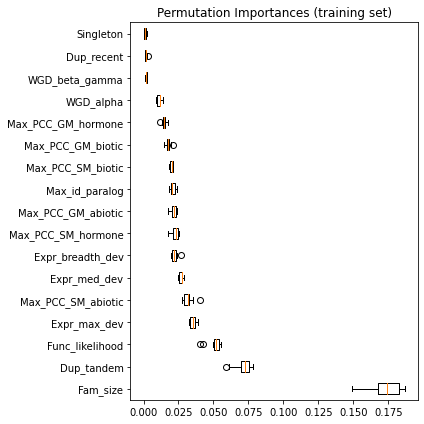

In [49]:
# Plot the permutation importance results
fig, ax = plt.subplots(figsize=(6,6))
ax.boxplot(importance_values, 
           vert=False, 
           labels=ordered_feature_label)
ax.set_title("Permutation Importances (training set)")
fig.tight_layout()
plt.show()

### ___Retrain model using top 10 features___

&#9989; **<font color=blue>DO THIS:</font>**  A simpler model is always better, because it is easier to understand and because it tends not to be overfitted. Let's use the top 10 features to train a new RandomForest model and see how well it does.


In [51]:
# Get top 10 feature names
feat_top10 = ordered_feature_label[:10]

# Get training data with only the top 10 features
X_train_top10 = X_train_scale[feat_top10]
X_train_top10.shape

(1222, 10)

In [58]:
# Do the same for testing data
X_test_top10 = X_test_scale[feat_top10]
X_test_top10.shape

(430, 10)

In [55]:
# Train RandomForest model via grid search
rfc_gs_top10 = run_randomforest(X_train_top10, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [56]:
# Get model score
rfc_gs_top10.best_score_

0.920227100416664

In [57]:
# Save model
filename = "model_randomforest_gridsearch_top10feat.save"

pickle.dump(rfc_gs_top10.best_estimator_, open(filename, 'wb'))

### &#9978; **<font color=purple>PAUSE: please turn your attention to the instructor. </font>**

---
<a name="step7"></a>
## __Step 7. Evaluate model with the testing set__

Assume that we are done with model building and have a final model that we cannot improve further. Then it is time to use the testing set to evaluate the model.

&#9989; **<font color=blue>DO THIS:</font>** Random Forest does quite a lot better than SVC. So let's see how well it works on the testing set.

Recall we save the best estimator for Random Forest earlier, let's load it up and evaluate it.

In [66]:
filename1 = "model_randomforest_gridsearch.save"
filename2 = "model_randomforest_gridsearch_top10feat.save"

rfc_loaded       = pickle.load(open(filename1, 'rb')) # model using all features
rfc_loaded_top10 = pickle.load(open(filename2, 'rb')) # model using top 10

# predict testing data labels with the model using all features
y_test_pred = rfc_loaded.predict(X_test_scale)

# predict testing data labels with the model using top 10 features
y_test_pred_top10 = rfc_loaded_top10.predict(X_test_top10)

In [67]:
# Take a look at the predictions
y_test_pred[:10]

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0.])

In [68]:
y_test_pred_top10[:10]

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0.])

### ___Confusion matrix___

&#9989; **<font color=blue>DO THIS:</font>** Let's generate __confusion matrices__ for the predicted results from the model with all features and the one with just the top 10. Disucss with your neighbor, what does the confusion matrix tell us?

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Get confusion matrrix
cm       = confusion_matrix(y_test, y_test_pred)
cm_top10 = confusion_matrix(y_test, y_test_pred_top10)

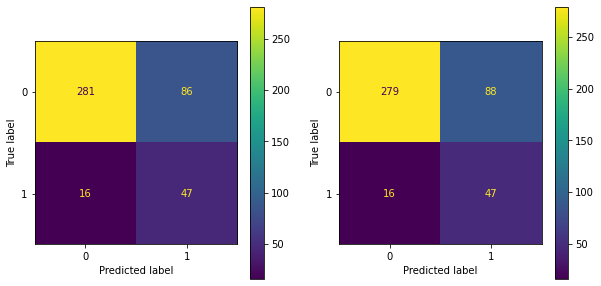

In [74]:
# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
cm_display  = ConfusionMatrixDisplay(cm).plot(ax=ax[0])
cm_display2 = ConfusionMatrixDisplay(cm_top10).plot(ax=ax[1])

The confusion matrix on the left tell us that:
- Number of true negative ($tn$) = 281
- Number of false positive ($fp$) = 86
- Number of false negative ($fn$) = 16
- Number of true positive ($tp$) = 47

&#9989; <font color=red>**QUESTION:**</font> Compare the results of these two models, should you use the one using all features or the one with top 10?

### ___Classification report___

&#9989; **<font color=blue>DO THIS:</font>** Let's also generate a classification report to get a few other performance matrics.

In [ ]:
from sklearn.metrics import classification_report

# Set class names
targets = ["GM", "SM"]

report = classification_report(y_test, y_test_pred, target_names=targets)
print(report)

Let's define these metrics:

|Metric|Formula|
|---|---|
|Precision|$p = tp/(tp + fp)$|
|Recall|$r = tp / (tp + fn)$|
|F1 score|$f1 = 2(p\times r)/(p + r)$|
|Accuracy|$(tp+tn)/(tp+fp)$|
|Macro averge|$0.5\times score_{\text{class0}} + 0.5\times score_{\text{class1}}$|
|Weighted averge|$P_{\text{class0}}\times score_{\text{class0}} + P_{\text{class1}}\times score_{\text{class1}}$<br>$P$: proportion of a class.|

Support: number of each class (not a performance metric)


### ___Graphics that help with evaluation___

&#9989; **<font color=blue>DO THIS:</font>** Here we provide two examples: ROC-AUC curve and precision-recall curve. The red line indicate how a naive classifer woul fair with random guesses. We only plot these curves for the model with top 10 features.

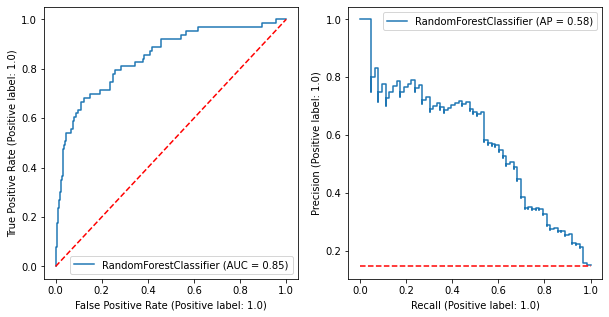

In [76]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

def plot_curves(X, y, estimator):

    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    # ROC-AUC curve
    RocCurveDisplay.from_estimator(estimator, X, y, ax=axs[0])
    axs[0].plot([0, 1], [0, 1],'r--')

    # Precision-recall curve
    PrecisionRecallDisplay.from_estimator(estimator, X, y, ax=axs[1])
    axs[1].legend(loc='upper right')
    axs[1].plot([0, 1], [0.1465, 0.1465],'r--')

    plt.show()

plot_curves(X_test_top10, y_test, rfc_loaded_top10)

&#9989; **<font color=blue>DO THIS:</font>** Let's also get these curves for training data.

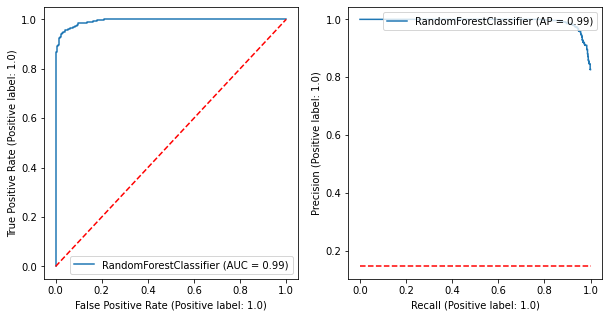

In [77]:
plot_curves(X_train_top10, y_train, rfc_loaded_top10)

&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbor, why are the model performance for training data so much better than that for the testing set?

[Note]: in both cases, we want the area under curve to be 1. A naive model will have a ROC-AUC of 0.5. But for Precision-Recall curve, the base line is __far below__ 0.5 like ROC-AUC. Why is that?

### &#9978; **<font color=purple>PAUSE: please turn your attention to the instructor. </font>**

---
<a name="step7"></a>
## __Step 8. Interpret model__

### ___Global interpetation using SHAP___

&#9989; **<font color=blue>DO THIS:</font>** Run the code below to get [SHAP (SHapley Additive exPlanations)](https://shap.readthedocs.io/en/latest/index.html) values that use game theory to determine how important each feature is in contributing to a prediction. There are MANY, MANY things you can do with SHAP and we will first figure out which features are more important than the others.

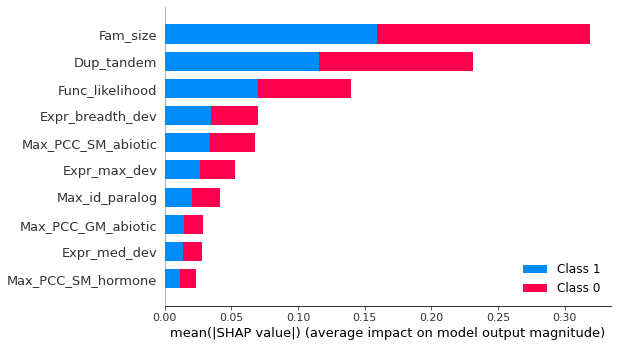

In [78]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(rfc_loaded_top10)
shap_values = explainer.shap_values(X_train_top10)
shap.summary_plot(shap_values, X_train_top10, sort=True)

We can see that `Fam_size` is the most important for both classes.

### ___SHAP values of different instances___

&#9989; **<font color=blue>DO THIS:</font>** Another way to look at the SHAP values is by focusing on a particular class. In the example below, we focus on how different features contribute to the predictions of label=1 (SM):

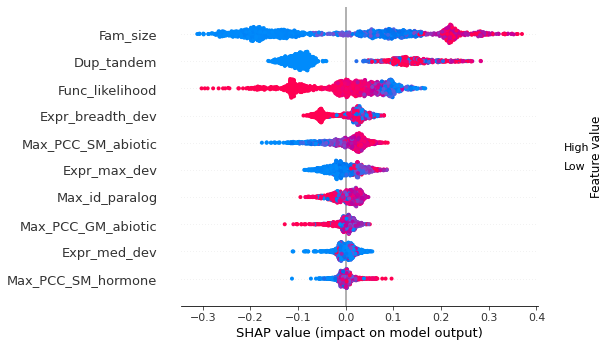

In [79]:
shap.summary_plot(shap_values[1], X_train_top10, sort=True)

For each feature $x$, two SHAP values are generated for each instance: one for $x$'s contribution to class $0$ and the other for its contribution to class $1$. In the plot above, we are only looking at the contribution to class $1$ and each dot is an instance.

Look at Fam_size (family size), instances with higher features values (i.e., in larger families) also tend to have higher positive SHAP values (i.e., positive contribution to be in class 1).

&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbor and interpret what the `Func_likelihood` feature's SHAP value distribution means where a higher feature values correlate with lower SHAP.

<font size=+3>&#9998;</font> Put your answer to the above question here

### ___Interacting features___

&#9989; **<font color=blue>DO THIS:</font>** Beyond looking individual features, we can also see if there is any interactions between features. Run the followng and see if you detect any interactions between `Fam_size` and `Func_likelihood`.

In [82]:
X_train_top10.columns

Index(['Fam_size', 'Dup_tandem', 'Func_likelihood', 'Expr_max_dev',
       'Max_PCC_SM_abiotic', 'Expr_med_dev', 'Expr_breadth_dev',
       'Max_PCC_SM_hormone', 'Max_PCC_GM_abiotic', 'Max_id_paralog'],
      dtype='object')

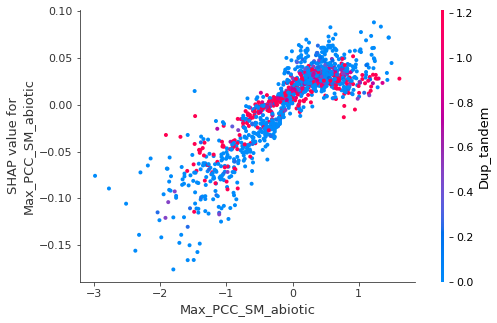

In [94]:
shap.dependence_plot(4, shap_values[1], X_train_top10, interaction_index=1)

&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbor, what's your interpretation of the above plot?

### &#9978; **<font color=purple>PAUSE: please turn your attention to the instructor. </font>**

-----
### Congratulations, we're done!